In [1]:
# 텐서플로,케라스 cpu, gpu 선택을 위해 지원되는 디바이스 넘버 보기
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1248313127913231787, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16897440050446831855
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7133675727125496928
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11857345975168162220
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [0]:
# clear_output() 으로 반복문에서 길~게 나오는 로그들을 매 루프마다 지우고 새로 출력하게 한다
from IPython.display import clear_output 

# InteractiveShell 옵션에 'all'을 주면 주피터노트북의 각 셀에서 가장 마지막 줄 뿐만 아니라, 출력하도록 한 모든 값이 출력됨
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 경고가 너무 많이뜨는경우 주피터가 죽기때문에 경고메세지는 무시하도록 설정
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

# Matplotlib을 시각화 모듈로 사용하지만, plot의 기본 스타일은 seaborn의 스타일을 따르도록 한다
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

# pandas 데이터프레임이 너무 긴~경우 가로, 세로 몇 줄까지 보여줄 것인지 설정
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)


In [3]:
# colab에서의 한글 폰트 설정

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


# # matplotlib 모듈에 한글폰트 적용
# from matplotlib import font_manager, rc
# font_name = 'AppleGothic'
# rc('font', family=font_name)

# # matplotlib에서 한글 사용 시, 마이너스 기호의 폰트가 깨지는 문제를 해결하는 설정
# mpl.rcParams['axes.unicode_minus'] = False

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [0]:
 import os

def getImageFromPath(path):
    x_dir_ls = []
    img_file = []
    y_list = []
    # count = 0

    for root, dirs, files in os.walk(path):
        for fname in files:
            full_fname = os.path.join(root, fname)
            # print(full_fname)
            x_dir_ls.append(full_fname)
            img_file.append(fname)
            y_list.append(fname.split("_")[0]) # 웹툰 제목을 y값인 라벨로 설정함(Y값은 파일명의 _앞에 위치한 웹툰 이름임)
            # count += 1 
            # if count == 2716:
            #   break

    # clear_output()        
    print("All image path listing complete!")
    return x_dir_ls, img_file, y_list # 각 이미지들의 경로, 이미지 파일명, y값 리스트 

# 실행예시
# path = 'D:/0_webtoon_imgs/test_dir_2'
# x_dir_ls, img_file, y_list = getImageFromPath(path)

In [0]:
# 이미지 numpy배열화
from PIL import Image as pil

def imageToNpArray(img_path_ls, w, h, img_mode): # 이미지 path가 리스트로 있어야 가능함
    X_RGBimgs = []
    graytoneimgs = []
    print("이미지 처리중...")

    for i in range(0, len(img_path_ls)):

        # 미니사이즈로 학습시켜보기 resize로 이미지 크기를 축소시켜서 사용할거임
        a = pil.open(img_path_ls[i]).resize((w,h), pil.ANTIALIAS).convert(mode=img_mode)
        
        k = np.asarray(a, dtype="uint8")
        
        X_RGBimgs.append(k)
        if i % 150 == 0:
            print(i,"/",len(img_path_ls)," ==> ",y_list[i], img_path_ls[i], k.shape, "completed", end='\r')
    plt.figure(figsize=(5,5))
    plt.imshow(a)
    plt.title("◆ 마지막으로 받은 이미지 예시")
    clear_output()
    plt.show()

    X_raw=np.asarray(X_RGBimgs)
    X_raw = X_raw.astype('float32')/255.0         # 이거 왜 해야하는걸까?? 
    
    print("◆ 이미지 np.array화 완료!",w,"*",h,"--")
    print("이미지 데이터 형태▽")
    print(X_raw.shape, X_raw.dtype)
    
    return  X_raw, graytoneimgs

In [6]:
import tensorflow as tf
# from keras.backend.tensorflow_backend import set_session

config = tf.compat.v1.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True       # 메모리가 더 필요한 경우 자동 증폭
config.gpu_options.per_process_gpu_memory_fraction = 1.0      # keras의 gpu 메모리 점유율 설정

tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



In [9]:
path = '/content/drive/My Drive/total_img_naver/total_img'
x_dir_ls, img_file, y_list = getImageFromPath(path)

All image path listing complete!


In [10]:
print("카테고리 갯수, x_dir갯수, img_file 갯수 : ", len(set(y_list)), len(x_dir_ls), len(img_file))

카테고리 갯수, x_dir갯수, img_file 갯수 :  0 0 0


In [0]:
# x_dir_ls에 이미지 파일이 아닌 다른 파일이 있는지 확인함

for each_dir in x_dir_ls:
  if each_dir[-3:] != 'png':
    print(each_dir)

In [0]:
# y_list[70].split(",")[1].strip().split("&")[1].strip()

In [0]:
# y_list

In [0]:
# 라벨을 그림 작가명으로 한다
changed_y_list = []

for title in y_list:
  drawing_author = title.split(",")[1].strip()
  splited = drawing_author.split("&")
  if len(splited) == 1:
    drawing_author = drawing_author
  else:
    drawing_author = splited[1].strip()
  
  changed_y_list.append(drawing_author)

y_list = changed_y_list

In [0]:
# y_list

In [0]:
# for author in y_list:
#   if author == 'D JUN':
#     print(author)

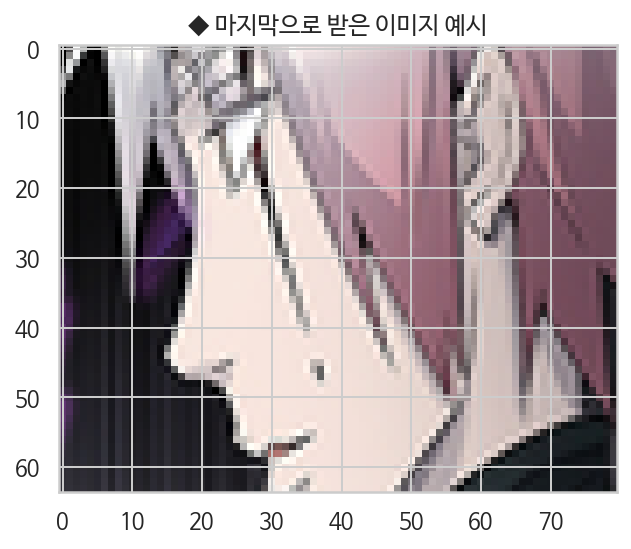

◆ 이미지 np.array화 완료! 80 * 64 --
이미지 데이터 형태▽
(26294, 64, 80, 3) float32


In [14]:
# X_raw, error_imgs = imageToNpArray(x_dir_ls, 80, 64, "RGB") #이미지 path 리스트, 가로px, 세로px, 이미지 모드

In [0]:
# len(X_raw)

In [0]:
# np.save('/content/drive/My Drive/Colab Notebooks/4D_naver_nparray', X_raw)

In [0]:
loaded_array = np.load('/content/drive/My Drive/Colab Notebooks/4D_naver_nparray.npy')

In [22]:
len(loaded_array)

26294

In [0]:
X_raw = loaded_array

In [24]:
print('Y데이터형태')
print("갯수:",len(y_list),"// 카테고리",len(set(y_list)))

Y데이터형태
갯수: 26294 // 카테고리 315


In [25]:
# y_list 라벨데이터(string) ->  숫자 라벨로 바꾸기 
# 이후에 다시 이 숫자를 그에 대응하는 라벨(string)로 변환시키는 메소드를 사용 할 수 있다 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = y_list
le.fit(y)
y= le.transform(y)
# y


LabelEncoder()

In [26]:
y[2]

3

In [27]:
le.inverse_transform([y[2]])    # 인덱스가 클래명과 대응한다

array(['D JUN'], dtype='<U14')

In [28]:
le.classes_    # 인덱스가 클래명과 대응한다 

array(['232', '247', '2사장', 'D JUN', 'HD3', 'HO9', 'JINU', 'Jencil',
       'Jiya', 'LICO', 'MOOHAK', 'OSIK', 'POGO', 'QTT', 'SAYM', 'SIU',
       'd몬', 'joana', 'theterm', '가스파드', '가천가', '감대',
       '강호진', '갸오오', '고긱', '고아라', '고요', '고일권',
       '고진호', '고태호', '곤세', '광운', '구구', '구동인', '구르',
       '구아진', '국승원', '국중록', '그리온', '기맹기',
       '기안84', '김규삼', '김도근', '김리아', '김문경',
       '김민우', '김민혁', '김상민', '김선희', '김성민',
       '김성진', '김세훈', '김숭늉', '김양수', '김우준',
       '김이연', '김인호', '김정현', '김지수', '김진석',
       '김태영', '김택기', '김현아', '꾀돌이', '꿀찬', '나',
       '나몬', '나윤희', '남수', '노란구미', '님니', '다온',
       '다홍', '닥터베르', '달꼬냑', '달꽃', '달삐', '델라',
       '도로롱', '도힌이', '돌연변이', '동물', '두둥', '두루',
       '두부', '두엽', '디귿'

In [29]:
# 트레인 /테스트데이터 나누기
# to_categorical 함수로 원 핫 인코딩해서 각 라벨들을 벡터로 만든다

from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.02, random_state=0)

Y_train = np_utils.to_categorical(y_train, 315)
Y_test = np_utils.to_categorical(y_test, 315)

Using TensorFlow backend.


In [0]:
# X_raw[0].shape

**모델 한번 만들어서 트레이닝 시키기**

In [0]:
# 2. 그림사이즈 80x64으로 축소시켜서 사용할 것임. 필터수 96개
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2

np.random.seed(0)

model = Sequential()
filter_num = 96

model.add(Conv2D(filter_num, (3, 3), activation='relu', input_shape=(64, 80, 3), padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))       # 0.2, 0.3 0.2

model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))       # 0.2, 0.3 0.2

model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))       # 0.3, 0.3 0.4

model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))       # 0.4, 0.4 0.4

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))       # 0.5, 0.3, 0.2
model.add(Dense(315, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 80, 96)        2688      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 80, 96)        83040     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 80, 96)        384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 40, 96)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 40, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 40, 96)        83040     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 40, 96)       

In [34]:
y_train.shape

(25768,)

In [35]:
Y_train.shape

(25768, 315)

In [36]:
from keras.preprocessing.image import ImageDataGenerator

# 오그멘테이션 자료 set 만들기
print('Using Full Set augmented data')
train_generator = ImageDataGenerator(
    zoom_range=0.05,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True)

train_generator.fit(X_train)

train_iterator = train_generator.flow(X_train, Y_train, batch_size=len(X_train))

N = 5 #오그멘테이션 할 배수
print("total N : ",N)

X_train_new = []
Y_train_new = []
for i in range(N):
    print("generating...",i,end="... ")
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    print("1/2..",end=" ")
    Y_train_new.append(y_train_new)
    print("ok!!")
    
X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)

clear_output()
print("All data are Generated!!")
X_train_new.shape

All data are Generated!!


(128840, 64, 80, 3)

In [37]:
X_train_new[0].shape

(64, 80, 3)

In [0]:
# Y_train_new

In [0]:
# hist = model.fit(X_train_new, Y_train_new, epochs=2, batch_size=64, validation_data=(X_test, Y_test), verbose=1)
# hist = model.fit(X_train_new, Y_train_new, epochs=2, batch_size=64, validation_split=0.02, verbose=1)

In [40]:
%%time
#오그멘테이션 없이 학습하고자 할 경우
# hist = model.fit(X_train, Y_train, epochs=3, batch_size=50, validation_data=(X_test, Y_test), verbose=1)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [0]:
#### 학습한 신경망모델 저장하기
# model.save("wbt_tmb_test2-1(epoch_500)_BN_3x3_acc_65_vacc_41.hdf5")

# model.save("/content/drive/My Drive/Colab Notebooks/naver_img_cnn_model.h5")

In [0]:
# 저장한 모델 불러오기
# from keras.models import load_model

# model = load_model("/content/drive/My Drive/Colab Notebooks/naver_img_cnn_model.h5")

**교차검증을 통해 모델 트레이닝 시키기**

In [43]:
from sklearn.model_selection import KFold

# 주어진 데이터를 학습 데이터와 테스트 데이터로 분리
# 교차검증을 한번 수행할 때마다 새로운 모델을 만든다 (교차검증 할때마다 트레이닝, 검증 데이터 셋은 변경된다)
# 새로 만들지 않으면, keras 모델은 메모리에 올라와 있는 기존 모델에 이어서 트레이닝 시킨다
# KFold함수는 랜덤하게 인덱스만 출력해준다

np.random.seed(0)
kf = KFold(n_splits=5, shuffle=True)

kf_history = []
kf_score = []
count = 0

for train, validation in kf.split(X_train_new, Y_train_new):
  model = Sequential()
  filter_num = 96

  model.add(Conv2D(filter_num, (3, 3), activation='relu', input_shape=(64, 80, 3), padding='same', kernel_regularizer=l2(0.01)))
  model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))       # 0.2, 0.3 0.2

  model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
  model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))       # 0.2, 0.3 0.2

  model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
  model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Dropout(0.3))       # 0.3, 0.3 0.4

  model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
  model.add(Conv2D(filter_num, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Dropout(0.4))       # 0.4, 0.4 0.4

  model.add(Flatten())
  model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
  model.add(Dropout(0.5))       # 0.5, 0.3, 0.2
  model.add(Dense(315, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  hist = model.fit(X_train_new[train], Y_train_new[train], epochs=50, batch_size=32, validation_data=(X_train_new[validation], Y_train_new[validation]), verbose=1)
  kf_history.append(hist.history)

  score = model.evaluate(X_test, Y_test, verbose=0)
  kf_score.append({'test_loss': score[0], 'test_accuracy': score[1]})

  print(count, " kfold training complete!")
  count += 1


# np.save('/content/drive/My Drive/Colab Notebooks/kf_history', kf_history)
# np.save('/content/drive/My Drive/Colab Notebooks/kf_score', kf_score)


Train on 103072 samples, validate on 25768 samples
Epoch 1/50
103072/103072 [==============================] - 461s 4ms/step - loss: 6.4121 - accuracy: 0.0794 - val_loss: 4.8927 - val_accuracy: 0.0961
Epoch 2/50
103072/103072 [==============================] - 449s 4ms/step - loss: 4.6661 - accuracy: 0.1219 - val_loss: 5.7998 - val_accuracy: 0.0698
Epoch 3/50
103072/103072 [==============================] - 449s 4ms/step - loss: 4.4077 - accuracy: 0.1500 - val_loss: 4.3689 - val_accuracy: 0.1560
Epoch 4/50
103072/103072 [==============================] - 451s 4ms/step - loss: 4.2581 - accuracy: 0.1697 - val_loss: 4.2669 - val_accuracy: 0.1586
Epoch 5/50
103072/103072 [==============================] - 451s 4ms/step - loss: 4.1634 - accuracy: 0.1841 - val_loss: 3.9785 - val_accuracy: 0.2079
Epoch 6/50
103072/103072 [==============================] - 450s 4ms/step - loss: 4.0883 - accuracy: 0.1959 - val_loss: 3.7678 - val_accuracy: 0.2468
Epoch 7/50
103072/103072 [=======================

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-43-6491ad412086>", line 50, in <module>
    hist = model.fit(X_train_new[train], Y_train_new[train], epochs=50, batch_size=32, validation_data=(X_train_new[validation], Y_train_new[validation]), verbose=1)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1239, in fit
    validation_freq=validation_freq)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_arrays.py", line 210, in fit_loop
    verbose=0)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_arrays.py", line 449, in test_loop
    batch_outs = f(ins_batch)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py", line 3792, in __call__
    outputs = self._graph_fn(*converted_inputs)
  File "/usr/local/lib/python3.6/dist-pac

KeyboardInterrupt: ignored

In [0]:
np.save('/content/drive/My Drive/Colab Notebooks/kf_history', kf_history)
np.save('/content/drive/My Drive/Colab Notebooks/kf_score', kf_score)

**모델 학습과정 평가**

In [0]:
# kf_history = np.load('/content/drive/My Drive/Colab Notebooks/kf_history.npy')
# kf_score = np.load('/content/drive/My Drive/Colab Notebooks/kf_score.npy')


In [45]:
# hist.history

{'accuracy': [0.10834528, 0.18341082],
 'loss': [6.482807810038434, 4.470932670464497],
 'val_accuracy': [0.10981761664152145, 0.17268140614032745],
 'val_loss': [5.379486169100826, 4.552055765780359]}

In [0]:
# score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
# score

In [0]:
# kf_history, kf_score

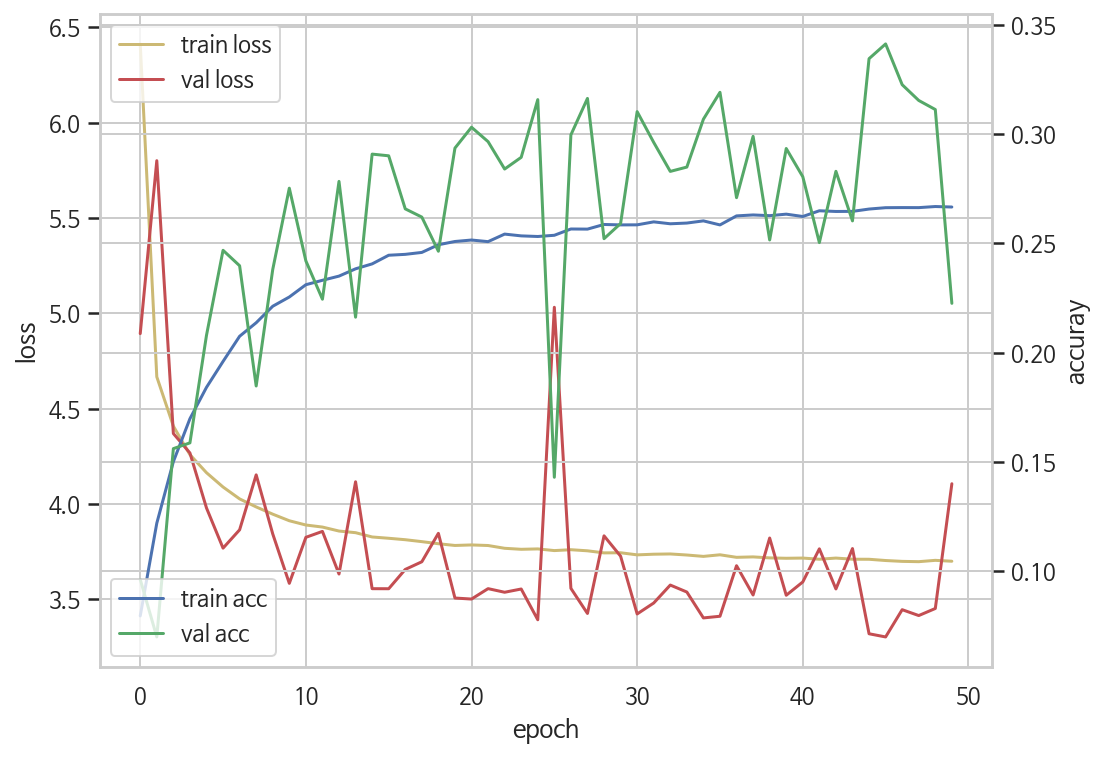

test_loss :  5.236812718467568 test_accuracy :  0.13117870688438416


In [58]:
# 첫번째  kfold 모델의 학습 과정 나타내기

%matplotlib inline
import matplotlib.pyplot as plt

history = kf_history[0]
score = kf_score[0]

fig, loss_ax = plt.subplots(figsize=(8, 6))

acc_ax = loss_ax.twinx()

loss_ax.plot(history['loss'], 'y', label='train loss')
loss_ax.plot(history['val_loss'], 'r', label='val loss')

acc_ax.plot(history['accuracy'], 'b', label='train acc')
acc_ax.plot(history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

clear_output()
plt.show()
print('test_loss : ', score['test_loss'], 'test_accuracy : ', score['test_accuracy'])

**모델 사용하여 predict**

In [0]:
# 테스트 데이터 보기
from sklearn.metrics import *
# X_test.shape
# V_raw.shape
y_pred = model.predict(X_test,verbose=0)
# print(y_pred)

In [60]:
len(y_pred[0])

315

In [61]:
?# inverse_transform은 수치화된 라벨값에 대응하는 원래의 라벨 명칭을 반환한다
label_Y = le.inverse_transform(y_test)
# result_df = pd.DataFrame([label_Y,y_test[0:50]],columns=['real_wbt_id','Y_val'])
result_df = pd.DataFrame()

# 원래의 y 카테고리 명칭
result_df['id']=label_Y

# 라벨인코더로 수치화시킨 y값
result_df['Y_val']=y_test

result_df = pd.concat([result_df,pd.DataFrame(y_pred)],axis=1)
clear_output()
result_df.tail()
print("테스트 데이터 갯수 : ", y_test.size)
print("(테스트 데이터 갯수, 카테고리 갯수) : ", y_pred.shape)

,id,Y_val,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,...,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314
521,이도희,217,0.013969,0.000224,0.000384,0.001545,0.001121,0.000871,0.002440,0.001153,0.000643,0.000672,0.001490,0.000071,0.008316,0.000438,0.000096,0.014252,0.000038,0.005236,0.002427,0.002967,0.000383,0.015045,0.032022,0.007267,0.001143,0.000695,0.000184,0.001413,0.002457,0.001353,1.388652e-05,0.001766,0.000377,0.010268,0.000015,0.000037,0.000027,0.000697,0.000204,0.000214,0.044940,0.007855,0.000213,0.000303,0.000057,0.003110,0.001692,0.000049,0.000809,0.028719,0.000431,0.012965,2.393669e-05,0.001279,0.004504,0.000229,0.004963,0.001160,0.000087,0.005026,0.000576,0.000103,0.001023,0.001398,0.000244,0.006052,0.001936,0.000435,0.002595,0.000932,0.000929,0.000128,0.000017,0.001067,0.000225,0.002913,1.917081e-05,0.000093,0.000815,0.000908,0.001636,0.000971,0.000578,0.001054,0.000554,0.002797,0.014197,0.001761,0.000123,0.004138,0.001906,0.004649,0.011484,0.000140,0.000063,2.819824e-05,0.000069,0.000352,...,0.000486,0.000385,0.003020,0.006580,0.006610,4.338767e-05,0.000016,0.007092,0.000190,0.000007,0.000344,0.000145,0.000291,0.001058,0.002062,0.004686,0.000131,0.001231,0.001291,0.000548,0.007222,0.013806,0.007532,0.001851,0.000893,0.023900,0.000225,0.000427,0.000175,0.007798,0.001735,0.015852,0.001227,0.006447,0.013870,0.000336,0.000009,0.015280,0.004136,0.000419,0.004616,0.003481,0.008260,0.021816,0.001724,0.037409,0.000026,0.013150,0.000691,0.004194,0.000088,0.000838,0.000005,0.000883,0.000223,0.000013,0.000170,0.002179,0.010408,0.000236,0.001146,0.011422,0.001549,0.000240,0.000020,0.002859,0.001944,0.000351,0.000348,0.000159,0.005044,0.000582,0.000031,0.002600,0.009129,0.000223,0.007206,0.000558,0.000755,0.000216,0.000101,0.000044,0.000017,0.000131,0.000059,0.000158,0.003436,0.005259,0.000080,0.009497,0.000341,0.000186,0.000477,0.000869,0.001602,2.485596e-06,0.000716,0.002387,0.000349,0.000092
522,조석,258,0.007652,0.002417,0.000849,0.000705,0.002692,0.010993,0.001319,0.005712,0.008701,0.002753,0.000129,0.000417,0.005946,0.001137,0.001169,0.011188,0.000189,0.009462,0.002396,0.003842,0.002482,0.000439,0.014356,0.002196,0.000294,0.011705,0.002979,0.003144,0.003293,0.000893,1.648407e-05,0.003447,0.003382,0.008299,0.000038,0.000236,0.000371,0.006730,0.000283,0.000296,0.002445,0.000913,0.002540,0.001001,0.000650,0.003739,0.003769,0.003066,0.000179,0.003332,0.000124,0.013402,1.484705e-03,0.001937,0.004817,0.000241,0.032468,0.001538,0.000636,0.003334,0.000603,0.000201,0.001049,0.002280,0.001073,0.002545,0.004253,0.000929,0.000834,0.019792,0.001907,0.001154,0.000695,0.004032,0.001072,0.006592,1.034703e-04,0.000425,0.001433,0.003759,0.000296,0.003455,0.005796,0.003294,0.003132,0.006762,0.000471,0.000329,0.001605,0.004028,0.007537,0.001281,0.000166,0.001184,0.000245,2.532418e-04,0.002138,0.009016,...,0.001193,0.000069,0.001941,0.027266,0.011975,4.864507e-04,0.001138,0.003072,0.000230,0.000166,0.000296,0.002037,0.002651,0.005408,0.003493,0.009322,0.003363,0.005451,0.009746,0.002191,0.004011,0.002004,0.002406,0.009390,0.002246,0.002008,0.003017,0.000940,0.002045,0.001784,0.007014,0.013173,0.002155,0.001217,0.000990,0.004395,0.000932,0.002264,0.000500,0.001228,0.001155,0.009303,0.010791,0.007042,0.005841,0.003697,0.000186,0.001422,0.000135,0.010844,0.000051,0.002673,0.000070,0.003194,0.000476,0.000380,0.001076,0.001428,0.003634,0.002106,0.000615,0.007653

테스트 데이터 갯수 :  526
(테스트 데이터 갯수, 카테고리 갯수) :  (526, 315)


In [62]:
np.sum(result_df.iloc[3][2:])

0.9999999

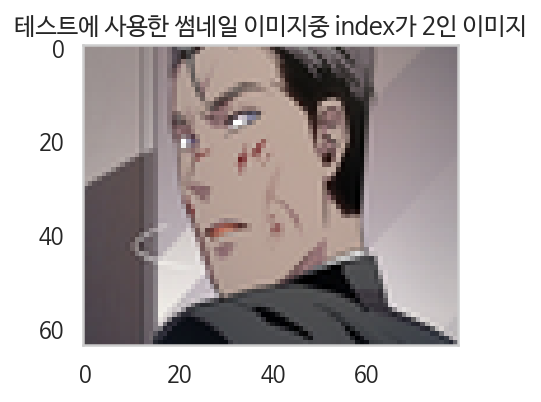

In [63]:
#직접 눈으로 비교할 label숫자 설정
find_i = 521  # X_test index => 521 (세상은 돈과 권력)

# X_test
test_img = X_test[find_i]
test_img = test_img
# test_img
real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(14,16))
plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = '테스트에 사용한 썸네일 이미지중 index가 2인 이미지'
plt.title(info2)
clear_output()
plt.show()


In [64]:
# X_test의 find_i에 해당하는 이미지의 각 카테고고리(라벨)에 속할 확률값들을 가져온다
finded = result_df.iloc[find_i,2:]

temp = pd.DataFrame()

# finded 의 인덱스는 각 카테고리 명칭을 수치화 한 숫자들이니까, 이걸 다시 기존 웹툰 제목으로 바꾼다
temp["id"] = le.inverse_transform(list(finded.index))

# 이 각 웹툰에 현재 선택한 이미지인 X_test[find_i]가 속할 확률을 데이터프레임으로 만든거임
temp["proba"] = finded
top10_df = temp.sort_values('proba', ascending=False).head(10)
top10_df

,id,proba
132,빤쓰,0.0835861
40,기안84,0.0449404
260,조용석,0.0374092
22,강호진,0.0320217
49,김성민,0.0287186
240,이힝,0.0239
258,조석,0.0218162
102,모랑지,0.018011
246,장래혁,0.0158524
252,전선욱,0.0152801


In [75]:
x_dir_ls[:2]

['/content/drive/My Drive/total_img_naver/total_img/Here U Are, D JUN_5화.png',
 '/content/drive/My Drive/total_img_naver/total_img/Here U Are, D JUN_4화.png']

In [78]:
regex = re.compile('/content/drive/My Drive/total_img_naver/total_img/.{0,}' + 'D JUN' + '.{0,}')
regex.findall('/content/drive/My Drive/total_img_naver/total_img/Here U Are, D JUN_5화.png')


['/content/drive/My Drive/total_img_naver/total_img/Here U Are, D JUN_5화.png']

In [0]:
# top10에 해당하는 작가의 웹툰 이미지 경로 아무거나 하나씩 가져오기

import re

top10_path_list = []
# drawing_author_list = []

for idx, row in top10_df.iterrows():  
  # drawing_author_list.append(row['id'])
  drawing_author = row['id']
  regex = re.compile('/content/drive/My Drive/total_img_naver/total_img/.{0,}' + drawing_author + '.{0,}')

  for each_dir in x_dir_ls:
    # print(each_dir)
    matched_path = regex.findall(each_dir)
    
    # break
    if len(matched_path) != 0:
      break

  top10_path_list.append(matched_path[0])

In [86]:
top10_path_list

['/content/drive/My Drive/total_img_naver/total_img/히어로메이커, 빤쓰_히어로메이커 49화 <습격>.png',
 '/content/drive/My Drive/total_img_naver/total_img/회춘, 기안84_19화 회춘 아빠 3화.png',
 '/content/drive/My Drive/total_img_naver/total_img/윈드브레이커, 조용석_3부 - 02화 찢겨진 날개.png',
 '/content/drive/My Drive/total_img_naver/total_img/호랭총각, 강호진_5 부 호 권 - 30. 미안..그건 실수였어..png',
 '/content/drive/My Drive/total_img_naver/total_img/나이트런, 김성민_나이트런 EX 문 오프닝 98화.png',
 '/content/drive/My Drive/total_img_naver/total_img/같은도장, 이힝_55화.png',
 '/content/drive/My Drive/total_img_naver/total_img/행성인간, 조석_35화.png',
 '/content/drive/My Drive/total_img_naver/total_img/소녀의 세계, 모랑지_212화 이번엔...png',
 '/content/drive/My Drive/total_img_naver/total_img/신의 언어, 장래혁_2부 114화 미끼 (1).png',
 '/content/drive/My Drive/total_img_naver/total_img/프리드로우, 전선욱_제134화 한태성의 일진 과

In [0]:
# title

In [0]:
title_list = []
for each_path in top10_path_list:
  title_with_author = each_path[len('/content/drive/My Drive/total_img_naver/total_img/'):].split("_")[0]
  title_list.append(title_with_author)

In [88]:
title_list

['히어로메이커, 빤쓰',
 '회춘, 기안84',
 '윈드브레이커, 조용석',
 '호랭총각, 강호진',
 '나이트런, 김성민',
 '같은도장, 이힝',
 '행성인간, 조석',
 '소녀의 세계, 모랑지',
 '신의 언어, 장래혁',
 '프리드로우, 전선욱']

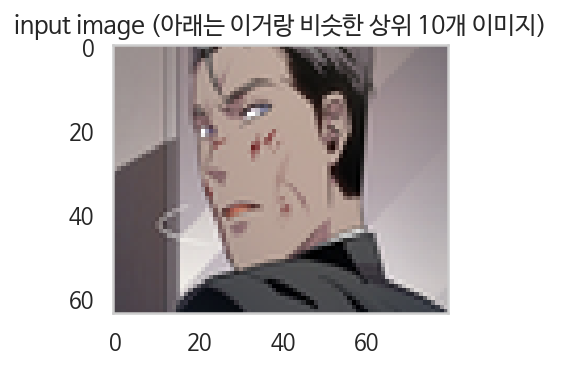

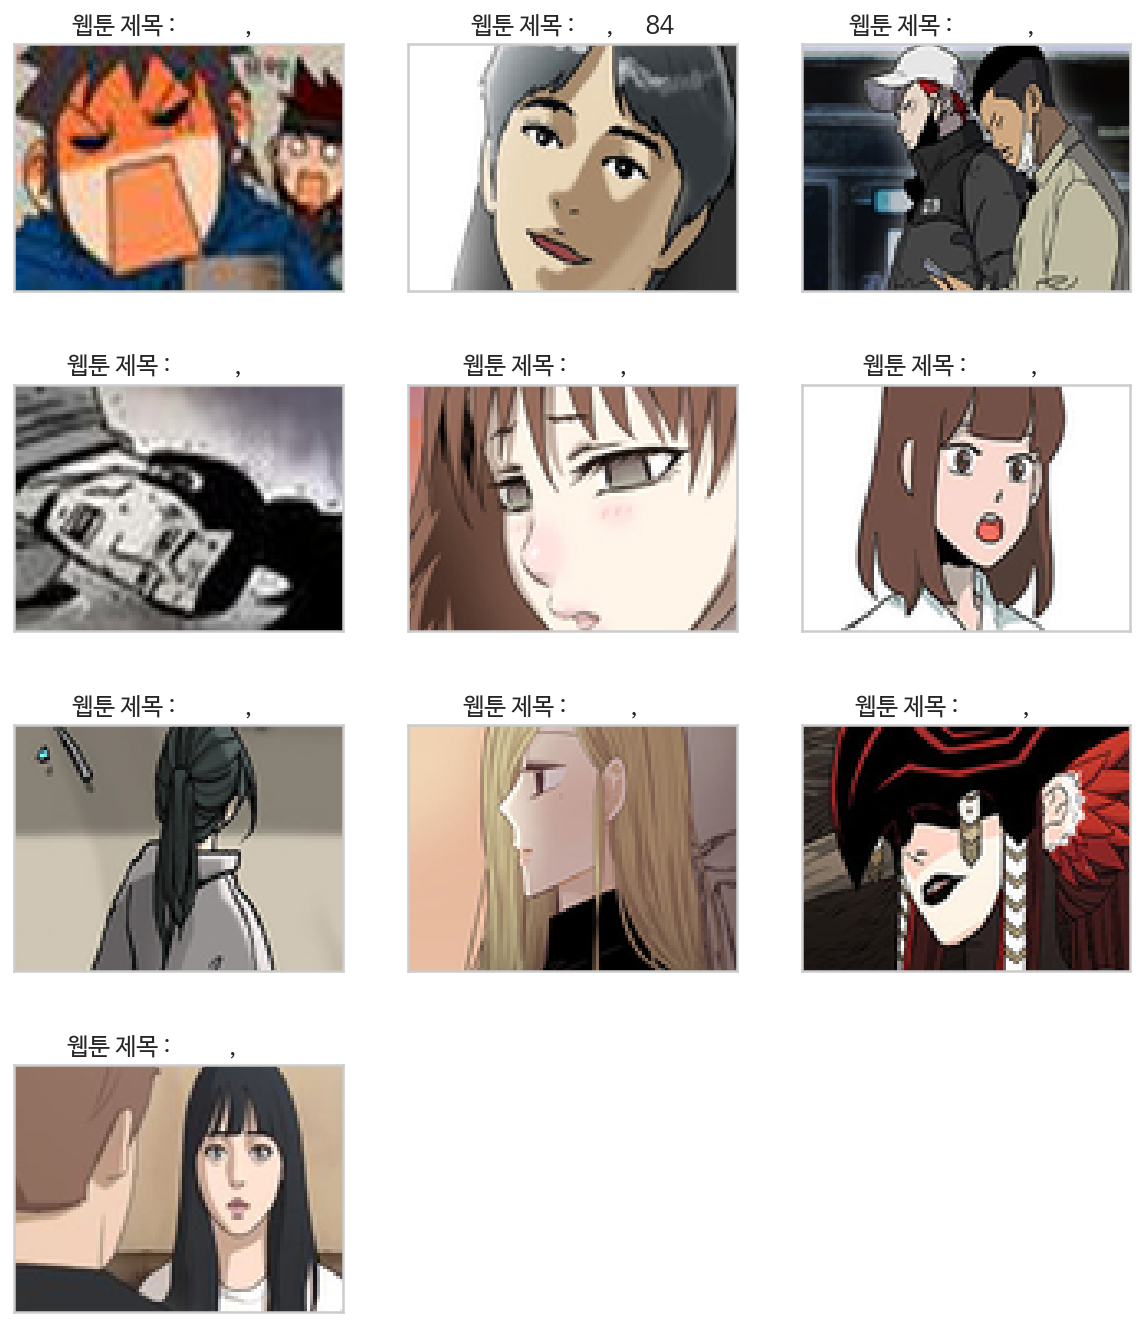

In [96]:
# proba기준 테스트에 사용한 썸네일 이미지와 가장 유사한 상위 10개웹툰 나열 --------------------------

# 비교용으로 넣은 테스트 이미지 

find_i = 521  # X_test index => 521 (세상은 돈과 권력)

# X_test
test_img = X_test[find_i]
test_img = test_img
# test_img
real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(3, 3))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = 'input image (아래는 이거랑 비슷한 상위 10개 이미지)'
plt.title(info2)
clear_output()
# plt.show()


i = 0

plt.figure(figsize=(10,12))
for each_path in top10_path_list:   
  # fig = plt.figure()
  plt.subplot(4, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  info = str(title_list[i])
  plt.title('웹툰 제목 : ' + info, fontsize='medium')
  # plt.subplots_adjust(hspace=0.4, wspace=0.2)
  plt.xticks([])
  plt.yticks([])
  i += 1

clear_output()

plt.show()

**다른 플랫폼의 웹툰 이미지를 가져와서 비슷한 그림체 뽑아보기**


In [97]:
# 다음 웹툰 썸네일 이미지 갖고와서 predict해보기

test_path = '/content/drive/My Drive/test_img/'
v_dir_ls, v_img_file, v_list = getImageFromPath(test_path)

All image path listing complete!


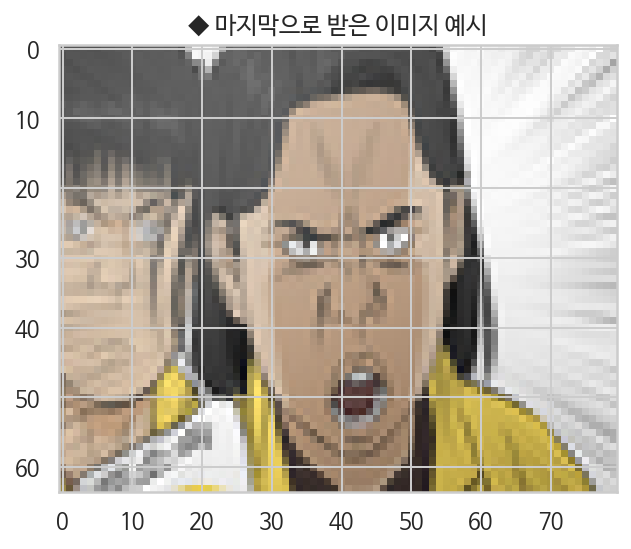

◆ 이미지 np.array화 완료! 80 * 64 --
이미지 데이터 형태▽
(6, 64, 80, 3) float32


In [98]:
V_raw, v_error_imgs = imageToNpArray(v_dir_ls,80,64,"RGB")       # 이미지 path 리스트, 가로px, 세로px, 이미지 모드

In [0]:
# 미리 트레이닝 시켜둔 예측모델 불러오기
# from keras.models import load_model

# model = load_model("/content/drive/My Drive/Colab Notebooks/daum_thumbnail_model.h5")

In [99]:
# 직접 이미지를 분류모델에 넣어서 proba값 확인

y_pred = model.predict(V_raw, verbose=1)
# print(y_pred)

6/6 [==============================] - 0s 39ms/step


In [0]:
label_Y = le.inverse_transform(y_test)

In [101]:
result_df = pd.DataFrame()
result_df['id'] = v_img_file
# result_df['Y_val']=y_test
result_df = pd.concat([result_df, pd.DataFrame(y_pred)],axis=1)
clear_output()
# result_df.tail(10)
# y_test.size
y_pred.shape
print('id목록\n', result_df.id.unique())

(6, 315)

id목록
 ['아싸가 알아버렸다_10화.png' '아비무쌍_63화.png'
 '인간을 먹는 성_82화.png' '블랙 베히모스_60화.png'
 '별똥별이 떨어지는 그 곳에서 기다려_2부 1화.png'
 '여의주_시즌2 15화.png']


In [102]:
result_df

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,...,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314
0,아싸가 알아버렸다_10화.png,0.012603,2.484995e-04,9.085374e-04,5.804138e-05,1.501048e-04,0.010557,3.373930e-04,0.001831,0.002733,7.879472e-04,9.147087e-05,4.003253e-05,0.008781,4.703695e-04,1.818599e-04,0.006542,1.780043e-05,0.009177,8.370330e-04,0.013069,0.000316,2.647057e-04,0.033518,0.002372,4.297853e-05,0.004161,1.903802e-04,1.260315e-03,4.731244e-03,5.138793e-04,3.040737e-07,0.011132,9.932242e-05,0.016610,1.381365e-06,3.225062e-05,1.022440e-05,0.001750,1.789073e-05,4.228566e-06,6.444483e-03,9.247645e-05,6.486176e-04,2.090844e-04,1.127551e-04,6.875112e-04,4.651902e-04,9.656893e-05,1.083257e-05,0.001542,8.870233e-06,0.031818,1.252546e-04,1.393647e-03,1.267544e-03,2.577821e-05,0.125010,1.000362e-03,8.510271e-05,1.337063e-03,3.236098e-05,4.421706e-06,9.074784e-05,9.030892e-04,1.156590e-04,9.775307e-04,1.004956e-03,1.285363e-04,1.362820e-04,0.005225,1.436732e-04,3.882858e-05,4.983825e-05,0.001895,5.144404e-04,0.007420,4.932952e-06,5.857431e-05,9.433173e-05,0.002325,3.004091e-04,0.002647,0.005619,7.567778e-04,0.000634,0.002528,1.854380e-04,1.794997e-05,3.715413e-04,2.467022e-03,0.006844,2.127929e-04,2.236943e-05,1.040053e-04,2.003690e-05,4.995574e-05,7.111392e-05,0.010819,1.169716e-04,...,3.095458e-04,6.846489e-07,2.391002e-04,0.084422,0.009685,4.109890e-05,2.820839e-05,3.809275e-03,3.473184e-05,4.141696e-06,4.416467e-06,1.004502e-04,2.586897e-04,0.003815,0.002017,0.003292,7.163245e-04,6.375930e-04,0.000938,8.391811e-04,7.002392e-03,6.566911e-03,3.826085e-03,0.002914,1.563949e-03,0.007032,7.405584e-04,1.314928e-04,1.860654e-04,6.427086e-04,0.001643,0.021862,1.077158e-03,6.298427e-04,7.766717e-04,0.002792,7.282363e-06,3.171062e-03,1.151583e-04,2.083065e-04,2.311139e-04,0.003579,0.006205,0.007491,0.002603,8.475805e-03,3.157559e-06,8.405712e-04,1.178331e-04,0.009541,3.701286e-06,8.752556e-04,5.014676e-07,7.357824e-04,9.369946e-04,4.094140e-05,9.941155e-05,4.684234e-04,6.274761e-04,1.920116e-04,5.575555e-05,1.333013e-02,0.063477,1.631132e-03,1.289034e-04,0.011966,0.009509,2.741121e-04,8.380813e-05,5.205423e-05,1.237963e-03,6.450758e-04,5.489554e-05,3.335680e-04,3.179051e-04,1.618658e-05,2.070549e-04,1.594896e-04,2.535422e-05,1.780410e-05,4.321460e-04,0.001787,2.879140e-05,1.065985e-04,3.816379e-04,2.622830e-05,7.617508e-05,2.778920e-04,6.117802e-05,0.001659,1.914576e-04,3.476113e-05,1.493400e-05,6.754514e-05,8.666766e-05,2.534913e-06,3.839258e-05,6.913640e-05,2.140071e-04,6.688856e-06
1,아비무쌍_63화.png,0.000342,7.490261e-08,8.172955e-08,4.383414e-11,4.263721e-08,0.000106,2.454525e-10,0.000002,0.000036,8.331573e-09,2.304742e-12,7.510732e-12,0.000001,9.830146e-09,5.792053e-09,0.000005,1.688722e-11,0.002244,2.192944e-07,0.000007,0.000005,1.370345e-11,0.000554,0.000001,9.759921e-12,0.000393,8.098783e-07,5.795418e-07,3.978459e-07,1.471098e-09,3.260141e-16,0.000005,9.282746e-08,0.000048,3.349202e-14,4.669694e-13,9.923271e-11,0.000006,2.199185e-11,1.365718e-12,7.950501e-08,5.382098e-10,2.093414e-07,2.230325e-08,1.745042e-11,5.200511e-07,2.969901e-07,1.364421e-08,1.281036e-13,0.000002,5.735218e-13,0.001027,5.923160e-08,5.838400e-07,6.120837e-07,1.456016e-12,0.886915,4.800279e-09,6.705213e-09,5.321523e-07,5.283180e-12,9.646789e-15,3.895129e-11,7.659030e-08,4.373013e-09,4.930709e-07,3.862967e-07,1.104158e-09,1.570320e-08,0.001007,1.941923e-09,1.619833e-0

In [0]:
# le.classes_

In [0]:
#직접 눈으로 비교할 label숫자 설정

find_i = 4        # 

# X_test
test_img = V_raw[find_i]
test_img = test_img
# test_img
real_id = result_df.id[find_i]
# real_id

In [0]:
# plt.imshow(test_img)

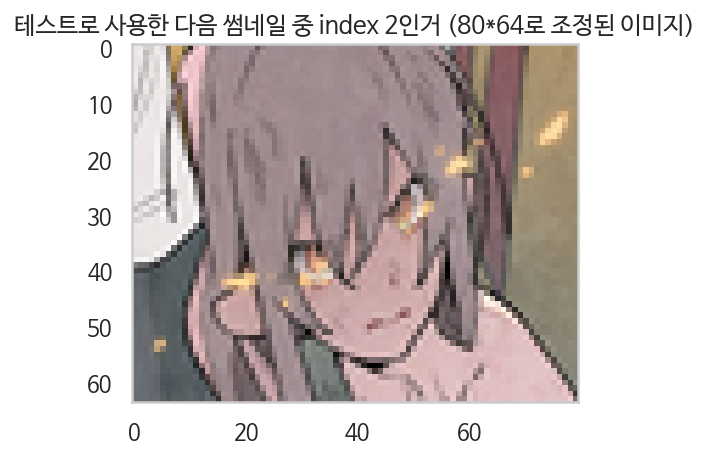

In [138]:
plt.figure(figsize=(4, 6))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = '테스트로 사용한 다음 썸네일 중 index 2인거 (80*64로 조정된 이미지)'
plt.title(info2)
clear_output()
plt.show()


In [0]:
# 다음 이미지를 넣었을때, 가장 비슷한 확률값을 가진 네이버 웹툰의 이미지 아무거나 10개 가져오기

finded = result_df.iloc[find_i,1:]
temp = pd.DataFrame()
temp["id"] = le.inverse_transform(list(finded.index))
temp["proba"] = finded
top10_df = temp.sort_values('proba', ascending=False).head(10)

In [140]:
top10_df

,id,proba
0,232,0.172634
252,전선욱,0.0962818
49,김성민,0.0753463
56,김인호,0.0709644
218,이동건,0.060221
17,joana,0.0532422
143,상하,0.0396519
59,김진석,0.0244644
40,기안84,0.0239194
102,모랑지,0.0214133


In [0]:
# top10에 해당하는 작가의 웹툰 이미지 경로 아무거나 하나씩 가져오기

import re

top10_path_list = []
# drawing_author_list = []

for idx, row in top10_df.iterrows():  
  # drawing_author_list.append(row['id'])
  drawing_author = row['id']
  regex = re.compile('/content/drive/My Drive/total_img_naver/total_img/.{0,}' + drawing_author + '.{0,}')

  for each_dir in x_dir_ls:
    # print(each_dir)
    matched_path = regex.findall(each_dir)
    
    # break
    if len(matched_path) != 0:
      break

  top10_path_list.append(matched_path[0])

In [142]:
top10_path_list

['/content/drive/My Drive/total_img_naver/total_img/패밀리 사이즈, 남지은&김인호_시즌2 232화.png',
 '/content/drive/My Drive/total_img_naver/total_img/프리드로우, 전선욱_제134화 한태성의 일진 과외 (1).png',
 '/content/drive/My Drive/total_img_naver/total_img/나이트런, 김성민_나이트런 EX 문 오프닝 98화.png',
 '/content/drive/My Drive/total_img_naver/total_img/패밀리 사이즈, 남지은&김인호_시즌2 362화.png',
 '/content/drive/My Drive/total_img_naver/total_img/유미의 세포들컷툰, 이동건_269화 우리집 끝판왕.png',
 '/content/drive/My Drive/total_img_naver/total_img/킬더킹, 마사토끼&joana_킬러 밤 (6).png',
 '/content/drive/My Drive/total_img_naver/total_img/호곡, 감대_02. 이상한 소녀.png',
 '/content/drive/My Drive/total_img_naver/total_img/약한영웅, 서패스&김진석_96화 - 바쿠, 고탁 (4).png',
 '/content/drive/My Drive/total_img_naver/total_img/회춘, 기안84_19화 회춘 아빠 3화.png',
 '/content/drive/My Drive/total_img_naver/total_img/소녀의 세ᄀ

In [0]:
title_list = []
for each_path in top10_path_list:
  title_with_author = each_path[len('/content/drive/My Drive/total_img_naver/total_img/'):].split("_")[0]
  title_list.append(title_with_author)

In [144]:
title_list

['패밀리 사이즈, 남지은&김인호',
 '프리드로우, 전선욱',
 '나이트런, 김성민',
 '패밀리 사이즈, 남지은&김인호',
 '유미의 세포들컷툰, 이동건',
 '킬더킹, 마사토끼&joana',
 '호곡, 감대',
 '약한영웅, 서패스&김진석',
 '회춘, 기안84',
 '소녀의 세계, 모랑지']

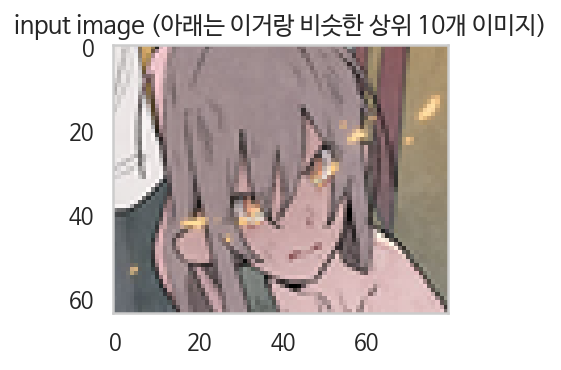

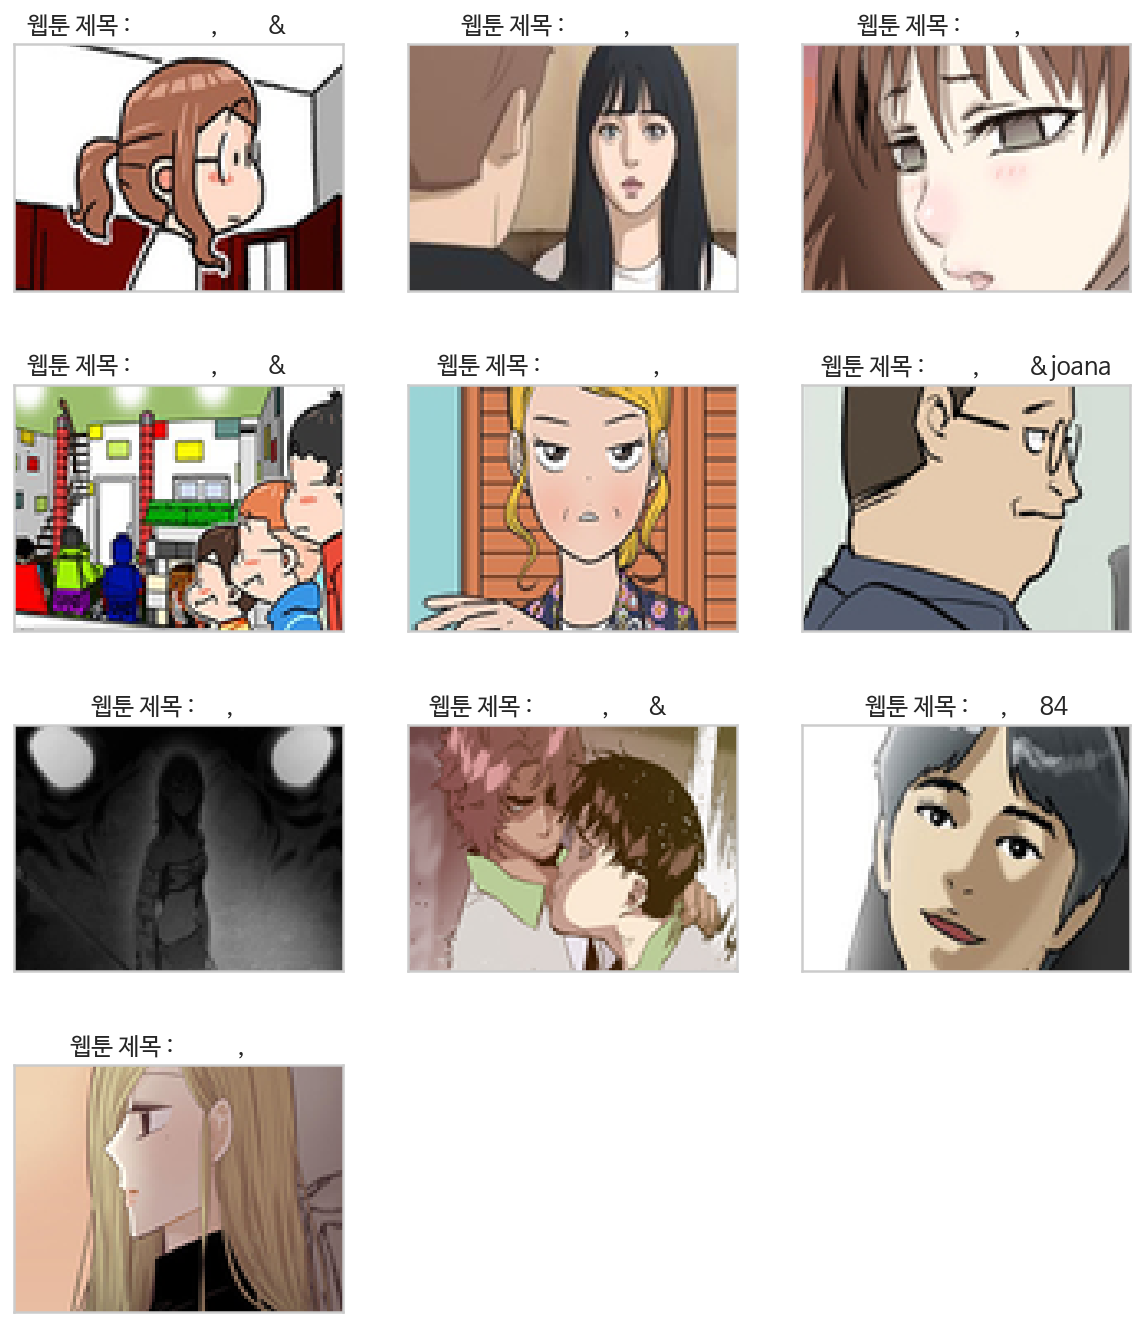

In [145]:
# proba기준 유사한 상위 10개웹툰 나열 --------------------------

# 비교용으로 넣은 테스트 이미지 


# X_test
test_img = V_raw[find_i]
test_img = test_img
# test_img
real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(3, 3))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = 'input image (아래는 이거랑 비슷한 상위 10개 이미지)'
plt.title(info2)
clear_output()
# plt.show()

i = 0

plt.figure(figsize=(10,12))
for each_path in top10_path_list:   
  # fig = plt.figure()
  plt.subplot(4, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  info = str(title_list[i])
  plt.title('웹툰 제목 : ' + str(title_list[i]), fontsize='medium')
  # plt.subplots_adjust(hspace=0.4, wspace=0.2)
  plt.xticks([])
  plt.yticks([])
  i += 1

clear_output()

plt.show()